In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('oasis_longitudinal.csv')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [42]:
df.shape

(373, 15)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [44]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [45]:
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column

In [46]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [47]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df['Group']

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Group, Length: 373, dtype: int64

In [48]:
df = df.drop(['MRI ID', 'Hand'], axis=1) # Drop unnecessary columns

In [49]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

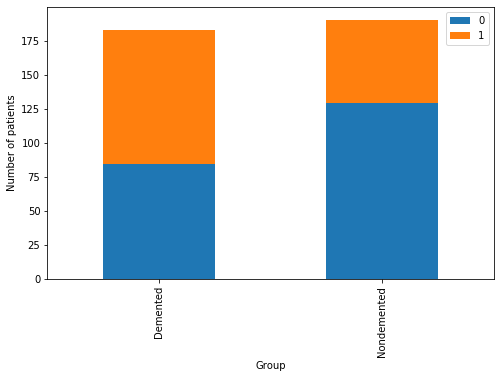

In [50]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()

(15.3, 30.0)

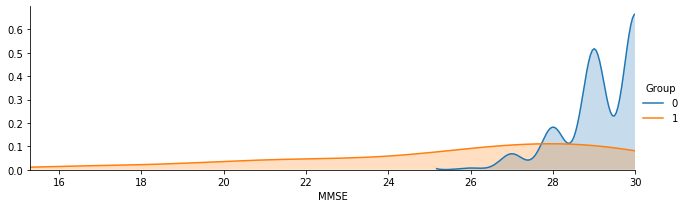

In [51]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.6, 0.9)

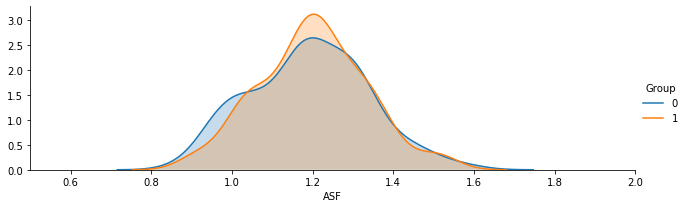

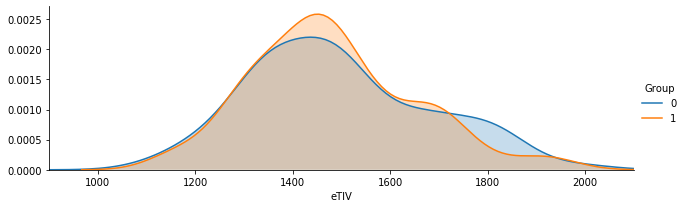

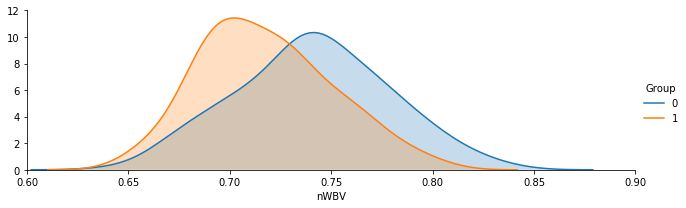

In [52]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(50, 100)

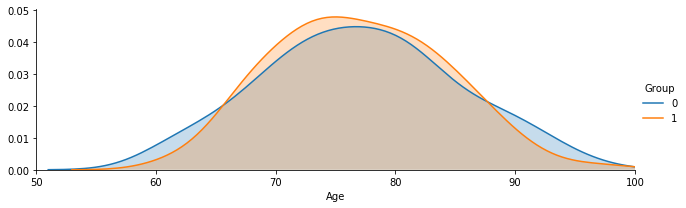

In [53]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

(0, 0.16)

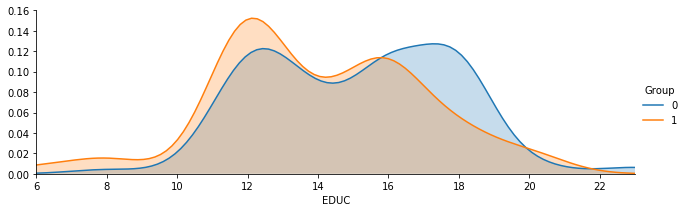

In [54]:
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

In [55]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

Subject ID     0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [66]:
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [67]:
df.shape

(373, 13)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   Group       373 non-null    int64  
 2   Visit       373 non-null    int64  
 3   MR Delay    373 non-null    int64  
 4   M/F         373 non-null    int64  
 5   Age         373 non-null    int64  
 6   EDUC        373 non-null    int64  
 7   SES         373 non-null    float64
 8   MMSE        371 non-null    float64
 9   CDR         373 non-null    float64
 10  eTIV        373 non-null    int64  
 11  nWBV        373 non-null    float64
 12  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 38.0+ KB


In [69]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
Y = df_dropna['Group'].values 
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y,test_size=0.3, random_state=0)

scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_trainval.shape,X_test.shape


((259, 8), (112, 8))

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

# DECISION TREE

In [73]:
acc = [] 
kfolds=5
best_score = 0
for md in range(1, 9):
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        best_parameter = md

SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)
m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7991704374057316
Best parameter for the maximum depth is:  7
Test accuracy with best parameter is  0.7767857142857143
Test recall with best parameters is  0.7931034482758621
Test AUC with the best parameter is  0.7761813537675607


In [ ]:
from sklearn import tree
tree.plot_tree(SelectedDTModel)

In [ ]:
classes=['Demented', 'Nondemented']
def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):

    plt.figure(figsize=(5, 5), dpi=100)
    np.set_printoptions(precision=2)

    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c >= 0:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    plt.savefig(savename, format='png')
    plt.show()

In [ ]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, PredictedOutput))

# RANDOM FOREST

In [ ]:
best_score = 0

for M in range(2, 15, 2): 
    for d in range(1, 9): 
        for m in range(1, 9): 
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

In [ ]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, PredictedOutput))

# ARTIFICIAL NEURAL NETWORK

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_trainval_scaled, Y_trainval,batch_size=32,epochs = 100)

In [ ]:
PredictedOutput = ann.predict(X_test_scaled)
PredictedOutput = (PredictedOutput > 0.5)
score, accuracy = ann.evaluate(X_test_scaled, Y_test,batch_size=32)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
# print(accuracy)
m = 'ANN'
acc.append([m, accuracy, test_recall, test_auc])

In [ ]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, PredictedOutput))

In [ ]:
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

In [ ]:
import joblib
joblib.dump(SelectedRFModel,'model_joblib_risk')
model=joblib.load('model_joblib_risk')
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=int(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    
    
    print(p1, p2, p3, p4, p5, p6, p7, p8)
    model = joblib.load('model_joblib_risk')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    if result == 0:
        Label(master, text="Non Demented").grid(row=31)
    elif result == 1:
        Label(master, text="Demented").grid(row=31)

In [ ]:
master = Tk()
master.title("Alzheimer's Disease Prediction")

label = Label(master, text = "Alzheimer's Disease Prediction", bg = "black", fg = "white").grid(row=0,columnspan=2)
Label(master, text="Enter M/F").grid(row=1)
Label(master, text="Enter Age").grid(row=2)
Label(master, text="Enter EDUC").grid(row=3)
Label(master, text="Enter SES").grid(row=4)
Label(master, text="Enter MMSE").grid(row=5)
Label(master, text="Enter eTIV").grid(row=6)
Label(master, text="Enter nWBV").grid(row=7)
Label(master, text="Enter ASF").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()
mainloop()